# Import necessary libraries

In [31]:
# basic functionality
import matplotlib.pyplot as plt # plotting data
import seaborn as sns # fancy plotting
import os # getting data from Folders
import pandas as pd # Dataframes
import numpy as np # working with arrays
import re # getting information from filenames (targets)

#sklearn basics
from sklearn import metrics # used for analysing training results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#KNN
from sklearn.neighbors import KNeighborsClassifier

#SVM
from sklearn.svm import SVC

#SQL implementation
import pyodbc

#fetch current Date
from datetime import datetime

# A1 Kaltumformung

In [4]:
# Base directory
base_dir = "HD1_ID"

# Initialize an empty list to hold all DataFrames
dataframes = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "HD1_ID_S-0-0084.csv":  # Only process the specific CSV file
            # Full path to the file
            file_path = os.path.join(root, file)
            
            # Extract the target (the immediate subfolder of HD1_ID)
            target = root.split(os.sep)[1]  # Example: 'Empty', 'Half', 'Loaded'
            
            # Read the CSV file
            df = pd.read_csv(file_path, sep=" ", header=None)
            
            # Add the target column
            df["target"] = target
            
            # Append the DataFrame to the list
            dataframes.append(df)

# Combine all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
df = final_df

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,target
0,-10.8,-11.0,-10.7,-10.8,-10.7,-11.1,-11.2,-11.0,-10.7,-10.9,...,-15.0,-15.4,-15.1,-14.9,-14.8,-15.1,-15.1,-15.0,-15.2,Empty
1,-9.9,-9.8,-9.6,-9.6,-9.5,-9.8,-9.8,-9.7,-9.9,-9.8,...,-14.5,-14.4,-14.1,-14.2,-14.1,-14.0,-14.3,-14.5,-14.5,Empty
2,-9.8,-10.0,-10.1,-10.6,-10.2,-10.1,-9.6,-9.8,-9.8,-9.9,...,-14.9,-14.5,-14.8,-14.6,-14.8,-15.1,-14.8,-14.8,-14.7,Empty
3,-9.5,-9.8,-9.8,-9.8,-9.9,-9.9,-9.7,-9.5,-9.8,-9.7,...,-15.1,-15.1,-15.0,-15.2,-15.2,-14.9,-14.9,-14.7,-14.8,Empty
4,-10.1,-10.1,-10.0,-10.2,-9.9,-9.9,-9.7,-10.0,-10.0,-9.7,...,-16.1,-16.0,-16.1,-15.8,-15.6,-15.8,-15.6,-15.9,-15.8,Empty


### Sensor information
IDN S-0-0084 (Torque feedback value)

Actual value of torque current, based on parameter P-0-0094. The parameters are related via the motor characteristics. (from firmware v2.10)

Unit: ampere in ‰

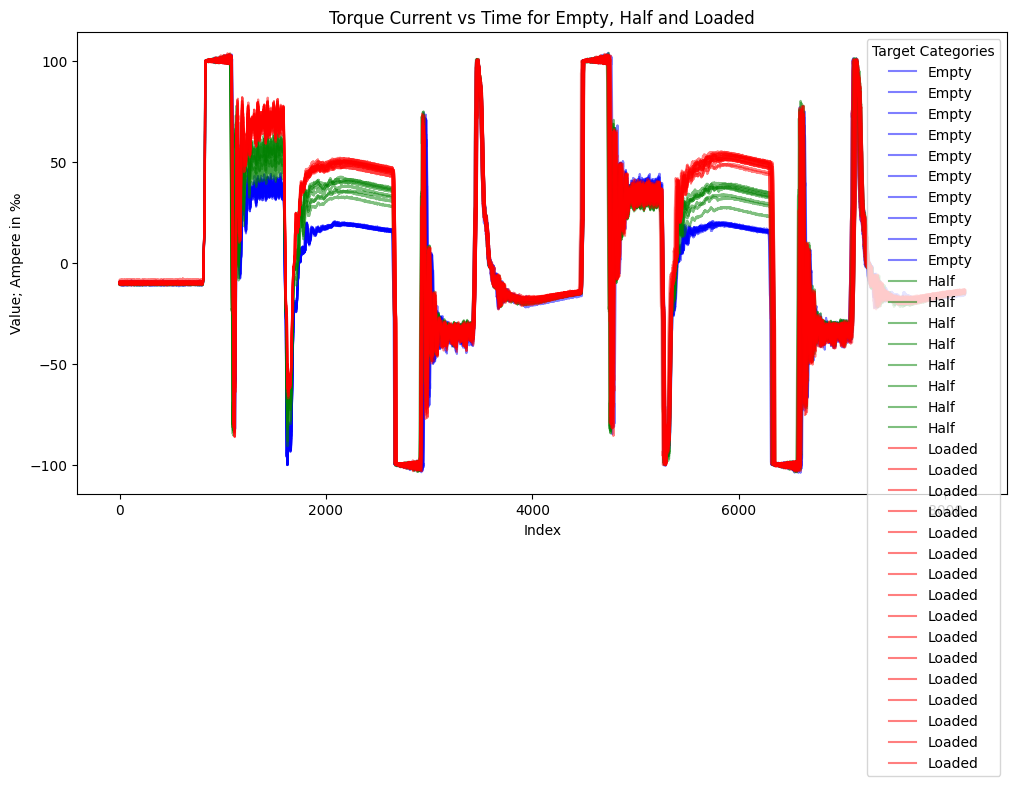

In [29]:
# Define a color map for the targets
color_map = {
    'Empty': 'blue',
    'Half': 'green',
    'Loaded': 'red'
}

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each target category with a different color
for target, color in color_map.items():
    subset = final_df[final_df['target'] == target]
    
    # Loop over each row and plot the values
    for index, row in subset.iterrows():
        x = range(len(row) - 1)  # Exclude the 'target' column for X-axis (using column indices)
        y = row[:-1]  # Exclude the 'target' column for Y-axis (using the actual values)
        plt.plot(x, y, label=target, color=color, alpha=0.5)  # Plot each line with alpha for transparency

# Add labels and a title
plt.xlabel('Index')  # X-axis label (Index of each vertical line)
plt.ylabel('Value; Ampere in ‰')  # Y-axis label (Value of each feature for)
plt.title('Torque Current vs Time for Empty, Half and Loaded')

# Add a legend
plt.legend(title="Target Categories")

# Show the plot
plt.show()

## Split and scale the data for model training

In [8]:
# Assuming 'df' is your DataFrame and 'target' is the column name for the labels
X = df.drop(columns=["target"])  # Features (all columns except 'target')
y = df["target"]  # Target (the 'target' column)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling is typically done only on the features, not the target)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)      # why not fit_transform here too?

# Print sizes for verification
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 23 samples
Test set size: 11 samples


## KNN

In [9]:
# Create the KNN classifier
k = 3  # Number of neighbors 3,5,6,7,8,9,10,11,12 ... 24
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


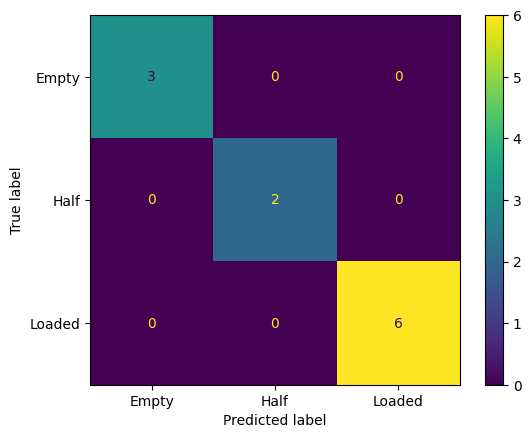

In [10]:
# Evaluate the classifier
accuracy_a1_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_a1_knn)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix_a1_knn = confusion_matrix(y_test, y_pred)
print(conf_matrix_a1_knn)
# Plot the confusion matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a1_knn, display_labels = ['Empty','Half','Loaded'])

cm_display.plot()
plt.show()

## SVM

In [11]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


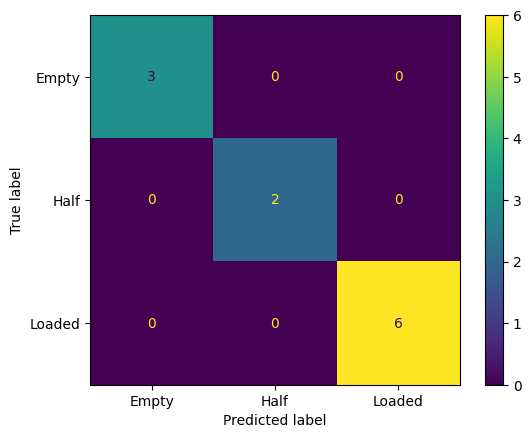

In [12]:
# Evaluate the classifier
accuracy_a1_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_a1_svm)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix_a1_svm = confusion_matrix(y_test, y_pred)

print (conf_matrix_a1_svm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a1_svm, display_labels = ['Empty', 'Half', 'Loaded'])

cm_display.plot()
plt.show()

# A2 Evaluation von Materialien

In [14]:
# Function to split a row into multiple sections
def split_row(row, num_sections):
    section_length = len(row) // num_sections
    return [row[i * section_length: (i + 1) * section_length] for i in range(num_sections)]

# Path to the folder containing .dat files
base_dir_a2 = "01_material02"

# Initialize an empty dictionary
dataframes_a2 = []

# Iterate over all .dat files in the folder
for file_name in os.listdir(base_dir_a2):
    if file_name.endswith(".dat"):
        # Construct the full file path
        file_path = os.path.join(base_dir_a2, file_name)
        
        # Read the file into a pandas DataFrame
        df_a2 = pd.read_csv(file_path, delimiter=';', header=None, decimal=',').transpose()

        # extract second colomn
        df_a2 = df_a2.drop(index = 0)
        
        # delete fist few datapoints
        df_a2 = df_a2.iloc[:, 100:]

        # Number of columns to extract
        num_columns_to_extract = 6700
        # Number of sections to split each row into
        num_sections = 9

        # Extract first 6600 columns and split each row
        result = []
        for _, row in df_a2.iloc[:, :num_columns_to_extract].iterrows():
            sections = split_row(row.values, num_sections)
            result.extend(sections)

        # Create a new DataFrame with the sections as rows
        df_a2 = pd.DataFrame(result)

        # Extract the target
        match = re.search(r"_(\w+)\.dat$", file_path)
        target_a2 = match.group(1)
        #print(target)
        
        # Add the target column
        df_a2["target"] = target_a2
        
        # Append the DataFrame to the list
        dataframes_a2.append(df_a2)
        
        #print(df_a2)

# Combine all DataFrames into a single DataFrame
df_a2 = pd.concat(dataframes_a2, ignore_index=True)

In [15]:
#display(df_a2)
df_a2.head()

,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,743,target
0,0.002,0.002,0.005,0.004,0.000,0.005,0.002,0.002,0.003,0.003,...,0.005,0.004,0.000,0.005,0.002,0.002,0.002,0.003,0.002,steel
1,0.003,0.003,0.002,0.001,0.006,0.004,0.002,0.004,0.003,0.004,...,0.002,0.002,0.003,0.004,0.003,0.004,0.004,0.003,0.001,steel
2,0.005,0.004,0.001,0.003,0.002,0.004,0.004,0.003,0.002,0.004,...,0.003,0.004,0.004,0.003,0.001,0.005,0.004,0.001,0.004,steel
3,0.003,0.003,0.004,0.003,0.002,0.004,0.005,0.000,0.007,0.005,...,0.001,0.004,0.003,0.004,0.004,0.003,0.001,0.003,0.005,steel
4,0.004,0.000,0.006,0.004,0.005,0.004,0.005,0.003,0.005,0.003,...,0.001,0.003,0.004,0.004,0.001,0.006,0.004,0.005,0.004,steel


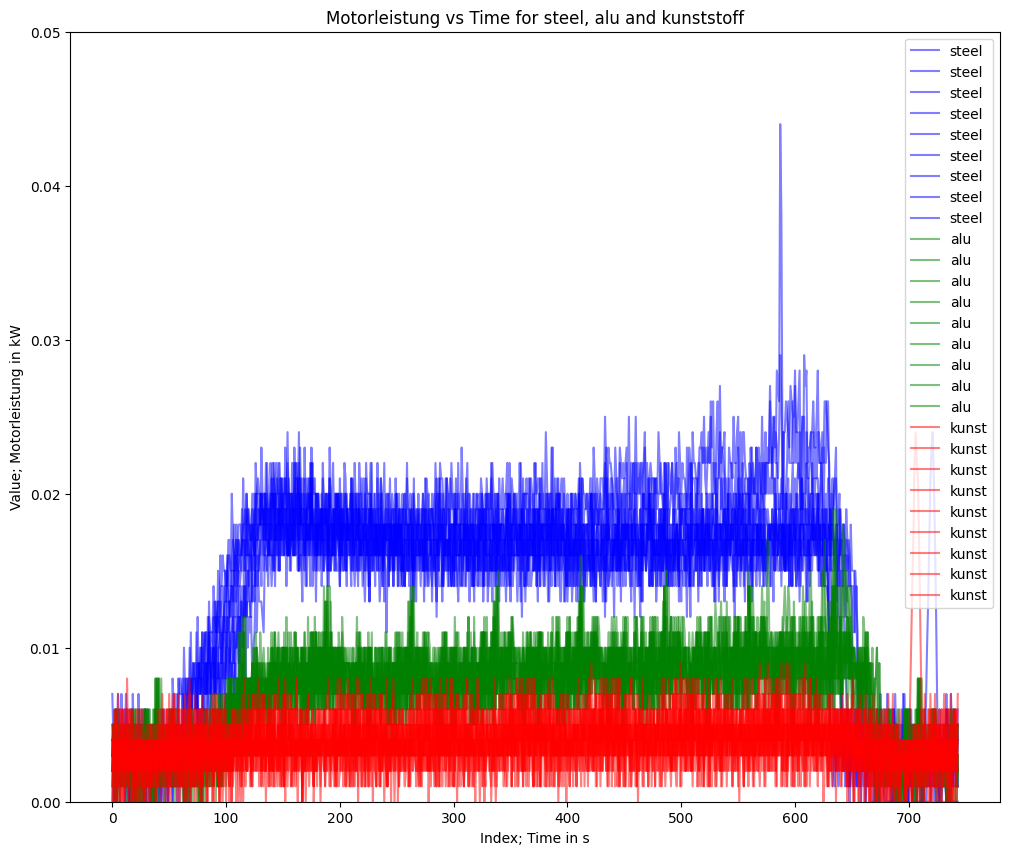

In [30]:
# Define a color map for the targets
color_map_a2 = {
    'steel': 'blue',
    'alu': 'green',
    'kunst': 'red'
}

# Create the plot
plt.figure(figsize=(12, 10))
plt.ylim(0, 0.05)

# Plot each target category with a different color
for target_a2, color in color_map_a2.items():
    subset = df_a2[df_a2['target'] == target_a2]
    
    # Loop over each row and plot the values
    for index, row in subset.iterrows():
        x = range(len(row) - 1)  # Exclude the 'target' column for X-axis (using column indices)
        y = row[:-1]  # Exclude the 'target' column for Y-axis (using the actual values)
        plt.plot(x, y, label=target_a2, color=color, alpha=0.5)  # Plot each line with alpha for transparency

# Add labels and a title
plt.xlabel('Index; Time in s')  # X-axis label (Index of each vertical line)
plt.ylabel('Value; Motorleistung in kW')  # Y-axis label (Value of each feature)
plt.title('Motorleistung vs Time for steel, alu and kunststoff')

# Add a legend
plt.legend(title="Target Categories")
plt.legend(loc='upper right')  # Move the legend to the upper-right corner

# Show the plot
plt.show()

## spliting and scaling dataset

In [24]:
# Assuming 'df' is your DataFrame and 'target' is the column name for the labels
X_a2 = df_a2.drop(columns=["target"])  # Features (all columns except 'target')
y_a2 = df_a2["target"]  # Target (the 'target' column)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train_a2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(X_a2, y_a2, test_size=0.3, random_state=40)

# Standardize the features (scaling is typically done only on the features, not the target)
scaler_a2 = StandardScaler()
X_train_a2 = scaler_a2.fit_transform(X_train_a2)
X_test_a2 = scaler_a2.transform(X_test_a2)      # why not fit_transform here too?

# Print sizes for verification
print(f'Training set size: {X_train_a2.shape[0]} samples')
print(f'Test set size: {X_test_a2.shape[0]} samples')

Training set size: 18 samples
Test set size: 9 samples


## KNN

In [19]:
# Create the KNN classifier
k_a2 = 3  # Number of neighbors 3,5,6,7,8,9,10,11,12 ... 24
knn_a2 = KNeighborsClassifier(n_neighbors=k_a2)

# Train the classifier
knn_a2.fit(X_train_a2, y_train_a2)

# Make predictions
y_pred_a2 = knn_a2.predict(X_test_a2)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       steel       1.00      1.00      1.00         4
         alu       1.00      1.00      1.00         3
       kunst       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[4 0 0]
 [0 3 0]
 [0 0 2]]


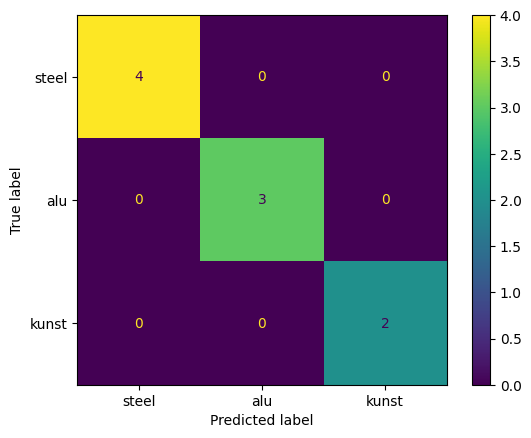

In [20]:
# Evaluate the classifier
accuracy_a2_knn = accuracy_score(y_test_a2, y_pred_a2)
print("Accuracy:", accuracy_a2_knn)

# Generate the classification report
report_a2 = classification_report(y_test_a2, y_pred_a2, target_names=['steel', 'alu', 'kunst'])
print("Classification Report:\n", report_a2)

# Generate the confusion matrix
conf_matrix_a2_knn = confusion_matrix(y_test_a2, y_pred_a2)
print(conf_matrix_a2_knn)
# Plot the confusion matrix

cm_display_a2 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a2_knn, display_labels = ['steel', 'alu', 'kunst'])

cm_display_a2.plot()
plt.show()

## SVM

In [21]:
# Create the SVM classifier
svm_a2 = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
svm_a2.fit(X_train_a2, y_train_a2)

# Make predictions
y_pred_a2 = svm_a2.predict(X_test_a2)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       steel       1.00      1.00      1.00         4
         alu       1.00      1.00      1.00         3
       kunst       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[4 0 0]
 [0 3 0]
 [0 0 2]]


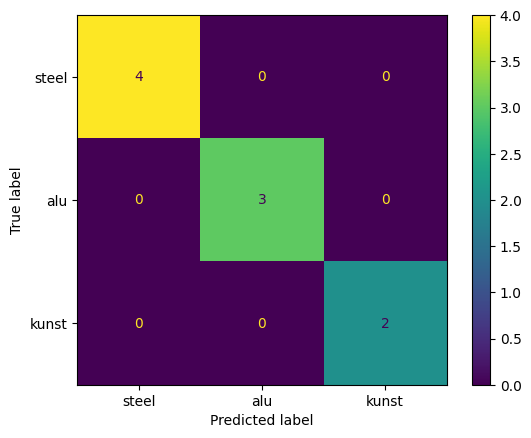

In [22]:
# Evaluate the classifier
accuracy_a2_svm = accuracy_score(y_test_a2, y_pred_a2)
print("Accuracy:", accuracy_a2_svm)

# Generate the classification report
report_a2 = classification_report(y_test_a2, y_pred_a2, target_names=['steel', 'alu', 'kunst'])
print("Classification Report:\n", report_a2)

# Generate the confusion matrix
conf_matrix_a2_svm = confusion_matrix(y_test_a2, y_pred_a2)


print (conf_matrix_a2_svm)

cm_display_a2 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a2_svm, display_labels = ['steel', 'alu', 'kunst'])

cm_display_a2.plot()
plt.show()

# SQL

In [47]:
# Establish the connection with local sql server
connection = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=MEINER\SQLEXPRESS;'
    'DATABASE=master;'
    'UID=sa;'
    'PWD=;'
    'TrustServerCertificate=YES;'
    'Encrypt=no'
)
# Create a cursor object
cursor = connection.cursor()

# SQL queries to create tables
create_tab_Kaltumformung_analytics = """
CREATE TABLE tab_Kaltumformung_analytics (
    Date DATE NOT NULL,
    ML_approach VARCHAR(255) NOT NULL,
    Accuracy FLOAT NOT NULL,
    Empty_Empty INT NOT NULL,
    Empty_Half INT NOT NULL,
    Empty_Loaded INT NOT NULL,
    Half_Empty INT NOT NULL,
    Half_Half INT NOT NULL,
    Half_Loaded INT NOT NULL,
    Loaded_Empty INT NOT NULL,
    Loaded_Half INT NOT NULL,
    Loaded_Loaded INT NOT NULL
);
"""
# SQL queries to create tables
create_tab_Material_analytics = """
CREATE TABLE tab_Material_analytics (
    Date DATE NOT NULL,
    ML_approach VARCHAR(255) NOT NULL,
    Accuracy FLOAT NOT NULL,
    Steel_Steel INT NOT NULL,
    Steel_Alu INT NOT NULL,
    Steel_Kunst INT NOT NULL,
    Alu_Steel INT NOT NULL,
    Alu_Alu INT NOT NULL,
    Alu_Kunst INT NOT NULL,
    Kunst_Steel INT NOT NULL,
    Kunst_Alu INT NOT NULL,
    Kunst_Kunst INT NOT NULL
);
"""

# Define the query to check if the table for a1 exists
check_table_a1_query = """
SELECT COUNT(*)
FROM information_schema.tables
WHERE table_name = 'tab_Kaltumformung_analytics';
"""
# Define the query to check if the table for a2 exists
check_table_a2_query = """
SELECT COUNT(*)
FROM information_schema.tables
WHERE table_name = 'tab_Material_analytics';
"""

# SQL queries to insert data
insert_query_a1 = """
INSERT INTO tab_Kaltumformung_analytics (
    Date, ML_approach, Accuracy, 
    Empty_Empty, Empty_Half, Empty_Loaded, 
    Half_Empty, Half_Half, Half_Loaded, 
    Loaded_Empty, Loaded_Half, Loaded_Loaded
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""
insert_query_a2 = """
INSERT INTO tab_Material_analytics (
    Date, ML_approach, Accuracy, 
    Steel_Steel, Steel_Alu, Steel_Kunst, 
    Alu_Steel, Alu_Alu, Alu_Kunst, 
    Kunst_Steel, Kunst_Alu, Kunst_Kunst
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

# Execute the query
cursor.execute(check_table_a1_query)

# Fetch the result
table_a1_exists = cursor.fetchone()[0]

cursor.execute(check_table_a2_query)
table_a2_exists = cursor.fetchone()[0]

# If the table doesn't exist, create it
if table_a1_exists == 0:
    # Execute the create table query
    cursor.execute(create_tab_Kaltumformung_analytics)
    print("Table A1 created successfully.")
else:
    print("Table A1 already exists.")

if table_a2_exists == 0:
    # Execute the create table query
    cursor.execute(create_tab_Material_analytics)
    print("Table A2 created successfully.")
else:
    print("Table A2 already exists.")

# Commit the changes
connection.commit()

# Close the connection
#cursor.close()
#connection.close()

Table A1 created successfully.
Table A2 already exists.


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\johan\AppData\Local\Temp\ipykernel_3868\1154194948.py:4: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=MEINER\SQLEXPRESS;'


## SQL Query for A1 KNN

In [23]:
# Insert data into the table
# Get today's date in EU format
date = datetime.now().strftime('%d.%m.%Y')
ml_approach_a1_knn = 'KNN'

#accuracy_a1_knn = accuracy_a1_knn

# Map the confusion matrix into corresponding columns
# The values from confusion matrix are type numpy.int64 and are not compatible as query input, they are converted to int here
empty_empty_a1_knn = int(conf_matrix_a1_knn[0][0])
empty_half_a1_knn = int(conf_matrix_a1_knn[0][1])
empty_loaded_a1_knn = int(conf_matrix_a1_knn[0][2])
half_empty_a1_knn = int(conf_matrix_a1_knn[1][0])
half_half_a1_knn = int(conf_matrix_a1_knn[1][1])
half_loaded_a1_knn = int(conf_matrix_a1_knn[1][2])
loaded_empty_a1_knn = int(conf_matrix_a1_knn[2][0])
loaded_half_a1_knn = int(conf_matrix_a1_knn[2][1])
loaded_loaded_a1_knn = int(conf_matrix_a1_knn[2][2])

# Execute the query
cursor.execute(insert_query_a1, (
    date, ml_approach_a1_knn, accuracy_a1_knn,
    empty_empty_a1_knn, empty_half_a1_knn, empty_loaded_a1_knn,
    half_empty_a1_knn, half_half_a1_knn, half_loaded_a1_knn,
    loaded_empty_a1_knn, loaded_half_a1_knn, loaded_loaded_a1_knn
))

# Commit the transaction
connection.commit()

NameError: name 'cursor' is not defined

## SQL Query for A1 SVM

In [49]:
# Insert data into the table
# Get today's date in EU format
date = datetime.now().strftime('%d.%m.%Y')
ml_approach_a1_svm = 'SVM'

#accuracy_a1_svm = accuracy_a1_svm

# Map the confusion matrix into corresponding columns
empty_empty_a1_svm = int(conf_matrix_a1_svm[0][0])
empty_half_a1_svm = int(conf_matrix_a1_svm[0][1])
empty_loaded_a1_svm = int(conf_matrix_a1_svm[0][2])
half_empty_a1_svm = int(conf_matrix_a1_svm[1][0])
half_half_a1_svm = int(conf_matrix_a1_svm[1][1])
half_loaded_a1_svm = int(conf_matrix_a1_svm[1][2])
loaded_empty_a1_svm = int(conf_matrix_a1_svm[2][0])
loaded_half_a1_svm = int(conf_matrix_a1_svm[2][1])
loaded_loaded_a1_svm = int(conf_matrix_a1_svm[2][2])

# Execute the query
cursor.execute(insert_query_a1, (
    date, ml_approach_a1_svm, accuracy_a1_svm,
    empty_empty_a1_svm, empty_half_a1_svm, empty_loaded_a1_svm,
    half_empty_a1_svm, half_half_a1_svm, half_loaded_a1_svm,
    loaded_empty_a1_svm, loaded_half_a1_svm, loaded_loaded_a1_svm
))

# Commit the transaction
connection.commit()

## SQL Query for A2 KNN

In [50]:
# Insert data into the table
# Get today's date in EU format
date = datetime.now().strftime('%d.%m.%Y')
ml_approach_a2_knn = 'KNN'

#accuracy_a2_knn = accuracy_a2_knn

# Map the confusion matrix into corresponding columns
steel_steel_a2_knn = int(conf_matrix_a2_knn[0][0])
steel_alu_a2_knn = int(conf_matrix_a2_knn[0][1])
steel_kunst_a2_knn = int(conf_matrix_a2_knn[0][2])
alu_steel_a2_knn = int(conf_matrix_a2_knn[1][0])
alu_alu_a2_knn = int(conf_matrix_a2_knn[1][1])
alu_kunst_a2_knn = int(conf_matrix_a2_knn[1][2])
kunst_steel_a2_knn = int(conf_matrix_a2_knn[2][0])
kunst_alu_a2_knn = int(conf_matrix_a2_knn[2][1])
kunst_kunst_a2_knn = int(conf_matrix_a2_knn[2][2])

# Execute the query
cursor.execute(insert_query_a2, (
    date, ml_approach_a2_knn, accuracy_a2_knn,
    steel_steel_a2_knn, steel_alu_a2_knn, steel_kunst_a2_knn,
    alu_steel_a2_knn, alu_alu_a2_knn, alu_kunst_a2_knn,
    kunst_steel_a2_knn, kunst_alu_a2_knn, kunst_kunst_a2_knn
))

# Commit the transaction
connection.commit()

## SQL Query for A2 SVM

In [46]:
# Insert data into the table
# Get today's date in EU format
date = datetime.now().strftime('%d.%m.%Y')
ml_approach_a2_svm = 'SVM'

#accuracy_a2_svm = accuracy_a2_svm

# Map the confusion matrix into corresponding columns
steel_steel_a2_svm = int(conf_matrix_a2_svm[0][0])
steel_alu_a2_svm = int(conf_matrix_a2_svm[0][1])
steel_kunst_a2_svm = int(conf_matrix_a2_svm[0][2])
alu_steel_a2_svm = int(conf_matrix_a2_svm[1][0])
alu_alu_a2_svm = int(conf_matrix_a2_svm[1][1])
alu_kunst_a2_svm = int(conf_matrix_a2_svm[1][2])
kunst_steel_a2_svm = int(conf_matrix_a2_svm[2][0])
kunst_alu_a2_svm = int(conf_matrix_a2_svm[2][1])
kunst_kunst_a2_svm = int(conf_matrix_a2_svm[2][2])

# Execute the query
cursor.execute(insert_query_a2, (
    date, ml_approach_a2_svm, accuracy_a2_svm,
    steel_steel_a2_svm, steel_alu_a2_svm, steel_kunst_a2_svm,
    alu_steel_a2_svm, alu_alu_a2_svm, alu_kunst_a2_svm,
    kunst_steel_a2_svm, kunst_alu_a2_svm, kunst_kunst_a2_svm
))

# Commit the transaction
connection.commit()

In [43]:
cursor.close()
connection.close()

## Reading Data from SQL Datenbank

In [ ]:
table_name = "tab_Kaltumformung_analytics"  # Aufgabe 1
query = f"SELECT TOP 10 * FROM {table_name}"  # Fetch first 10 rows

cursor.execute(query)
rows = cursor.fetchall()

print(f"Data from {table_name}:")
for row in rows:
    print(row)

In [ ]:
table_name = "tab_Material_analytics"  # Aufgabe 2
query = f"SELECT TOP 10 * FROM {table_name}"  # Fetch first 10 rows

cursor.execute(query)
rows = cursor.fetchall()

print(f"Data from {table_name}:")
for row in rows:
    print(row)